<a href="https://colab.research.google.com/github/GuiAlves1611/-coffee-sleep-classification/blob/main/coffee-sleep-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/synthetic_coffee_health_10000.csv")

In [3]:
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Mild,Service,0,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,NaN,Student,1,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,NaN,Student,0,0


In [4]:
#Verificando dados nulos e duplicados, colunas e linhas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

# A empresa Health&Life Analytics precisa entender melhor o perfil dos clientes e como o consumo de café se relaciona com aspectos de saúde.

In [5]:
df['Sleep_Quality'].value_counts()

,count
Sleep_Quality,
Good,5637
Fair,2050
Excellent,1352
Poor,961


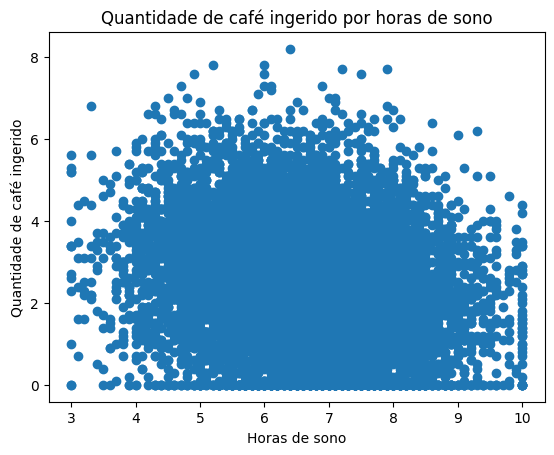

In [6]:
plt.scatter(df['Sleep_Hours'], df['Coffee_Intake'])
plt.title("Quantidade de café ingerido por horas de sono")
plt.xlabel("Horas de sono")
plt.ylabel("Quantidade de café ingerido")
plt.show()

# O gráfico de dispersão não evidencia uma relação linear forte entre a quantidade de café ingerido e as horas de sono.
# Observa-se elevada variabilidade do consumo em todos os níveis de sono,
# sugerindo que o efeito do café pode estar relacionado a outros fatores além da quantidade total ingerida.

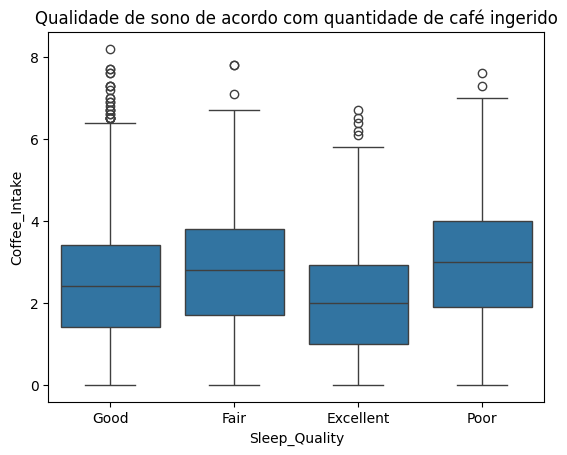

In [7]:
sns.boxplot(x='Sleep_Quality', y='Coffee_Intake', data=df)
plt.title('Qualidade de sono de acordo com quantidade de café ingerido')
plt.show()

#Parece haver uma correlação negativa: à medida que o consumo de café aumenta, a qualidade do sono relatada tende a cair de "Excelente" para "Ruim".
#No entanto, a sobreposição entre as caixas indica que o café é provavelmente apenas um dos muitos fatores que influenciam o sono dessas pessoas.

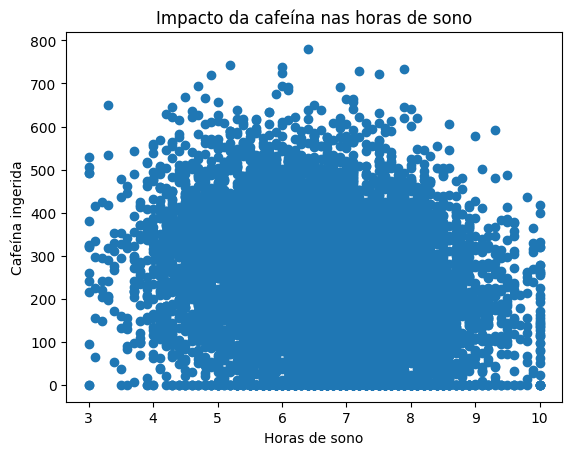

In [8]:
plt.scatter(df['Sleep_Hours'], df['Caffeine_mg'])
plt.title("Impacto da cafeína nas horas de sono")
plt.xlabel("Horas de sono")
plt.ylabel("Cafeína ingerida")
plt.show()

#O gráfico de dispersão não indica uma relação linear forte entre cafeína ingerida e horas de sono.
#Observa-se grande variabilidade de consumo em todos os níveis de sono, sugerindo que o impacto da cafeína pode depender de outros fatores além da quantidade total ingerida.

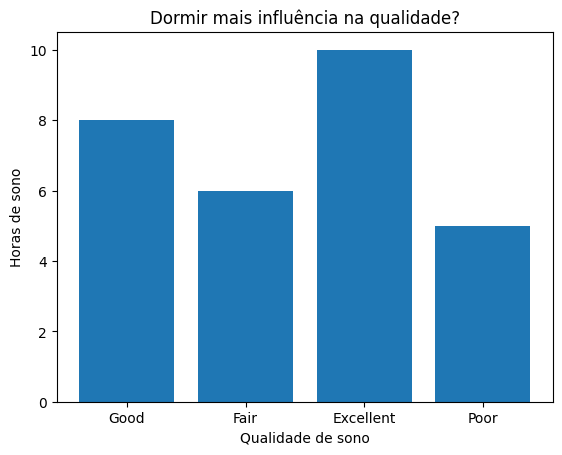

In [9]:
plt.bar(df['Sleep_Quality'], df['Sleep_Hours'])
plt.title("Dormir mais influência na qualidade?")
plt.xlabel("Qualidade de sono")
plt.ylabel("Horas de sono")
plt.show()

#Com base no gráfico, é possível observar que existe uma relação positiva entre as horas de sono e a qualidade do sono.
# Pessoas que possuem o sono excelente e bom possuem uma maior quantidade de sono
# Em contrapartida as pessoas que dormem menos tem a qualidade de sono ruim ou mediana

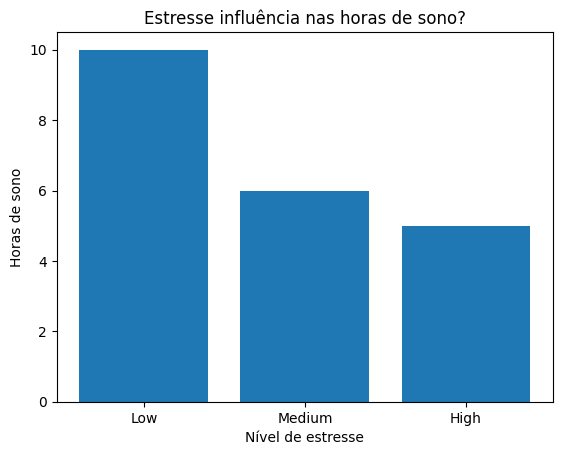

In [10]:
plt.bar(df['Stress_Level'], df['Sleep_Hours'])
plt.title("Estresse influência nas horas de sono?")
plt.xlabel("Nível de estresse")
plt.ylabel("Horas de sono")
plt.show()

# Com base no gráfico, é possível observar que existe uma relação positiva entre o estresse e as horas de sono.
# Pessoas com um baixo nível de estresse tendem a dormir mais do que as pessoas mais estressadas.

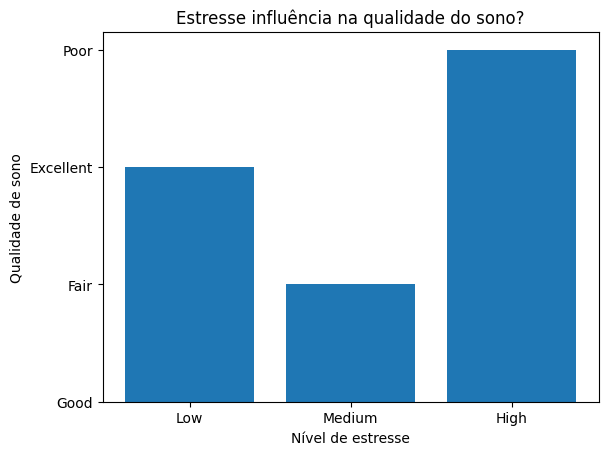

In [11]:
plt.bar(df['Stress_Level'], df['Sleep_Quality'])
plt.title("Estresse influência na qualidade do sono?")
plt.xlabel("Nível de estresse")
plt.ylabel("Qualidade de sono")
plt.show()

# Pessoas que são mais estressadas normalmente possuem uma qualidade de sono pior
# Em contrapartida pessoas que tem um nível de estresse menor possuem maior qualidade de sono

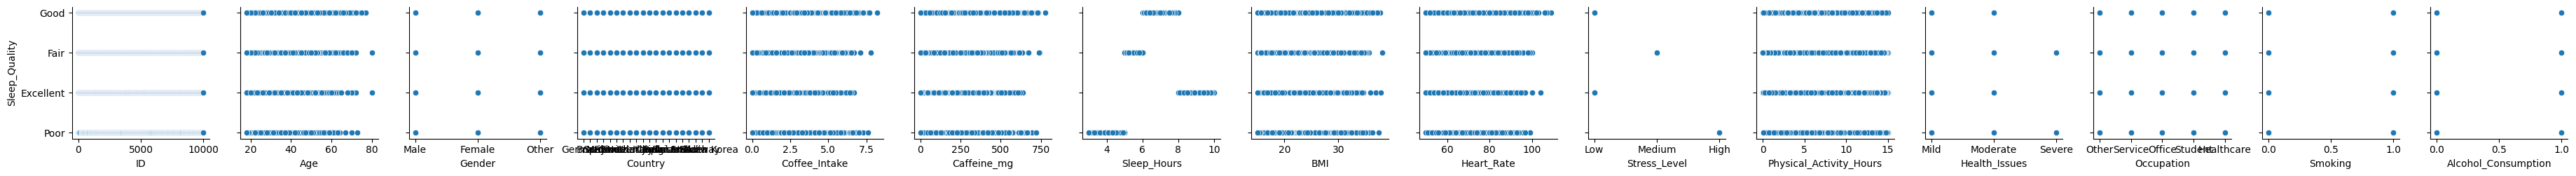

In [12]:
sns.pairplot(
    df,
    y_vars='Sleep_Quality',
    x_vars=[col for col in df.columns if col != 'Sleep_Quality'],
    kind='scatter'
)
plt.show()

In [13]:
pd.crosstab(df['Sleep_Quality'], df['Smoking'])

Smoking,0,1
Sleep_Quality,,
Excellent,1082,270
Fair,1636,414
Good,4494,1143
Poor,784,177


<Axes: xlabel='Sleep_Quality,Smoking'>

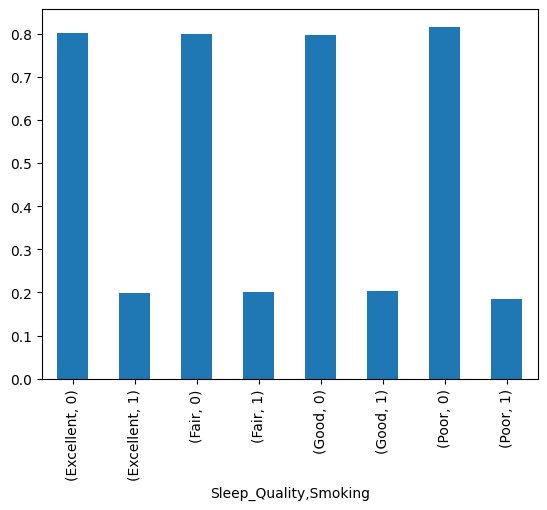

In [14]:
proporcao = df.groupby('Sleep_Quality')['Smoking'].value_counts(normalize=True)
proporcao.plot(kind='bar', stacked=True)

In [15]:
df["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [16]:
male_sleep = df[df['Gender'] == "Male"]['Sleep_Hours']
female_sleep = df[df['Gender'] == "Female"]['Sleep_Hours']
other_sleep = df[df['Gender'] == "Other"]['Sleep_Hours']

/tmp/ipython-input-403512721.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  grafico_boxplot = plt.boxplot([male_sleep, female_sleep, other_sleep], labels=['Masculino', 'Feminino', 'Outro'], patch_artist=True, showmeans=True, meanline=True, widths=0.5)


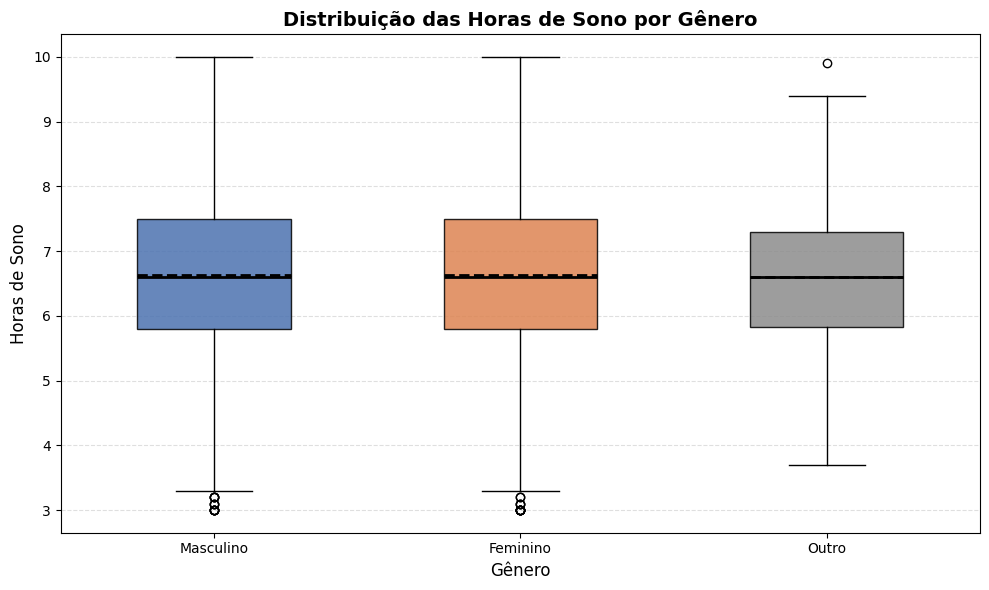

In [17]:
plt.figure(figsize=(10, 6))
grafico_boxplot = plt.boxplot([male_sleep, female_sleep, other_sleep], labels=['Masculino', 'Feminino', 'Outro'], patch_artist=True, showmeans=True, meanline=True, widths=0.5)

# Estilizando as caixas
colors = ['#4C72B0', '#DD8452', '#8C8C8C']
for patch, color in zip(grafico_boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.85)

# Estilizando linhas
for median in grafico_boxplot['medians']:
    median.set(color='black', linewidth=2)
for mean in grafico_boxplot['means']:
    mean.set(color='black', linewidth=2)

plt.title('Distribuição das Horas de Sono por Gênero', fontsize=14, weight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Horas de Sono', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# A maioria das pessoas em todos os grupos dorme entre 6 e 8 horas.
# No entanto, os grupos "Masculino" e "Feminino" mostram uma tendência maior a casos de privação severa de sono (outliers de 3 horas),
# enquanto o grupo "Outro" apresenta uma distribuição ligeiramente mais equilibrada, mas com um caso isolado de sono prolongado

In [18]:
df.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [19]:
df['Age_Group'] = pd.cut(df['Age'],
                      bins=[17, 25, 35, 45, 60, 100],
                      labels=['18-25', '26-35', '36-45', '46-60', '60+'])


In [20]:
df['Age_Group'].value_counts()

,count
Age_Group,
26-35,3053
36-45,2853
18-25,2293
46-60,1653
60+,148


In [21]:
df['Coffee_Group'] = pd.cut(df['Coffee_Intake'],
                        bins=[0, 1, 3, 5, 10],
                        labels=['Baixo', 'Moderado', 'Alto', 'Muito Alto'])


In [22]:
df['Coffee_Group'].value_counts()

,count
Coffee_Group,
Moderado,4800
Alto,3034
Baixo,1144
Muito Alto,464


In [23]:
tabela_pivotada = df.pivot_table(index='Stress_Level', columns='Age_Group', values='Coffee_Intake', aggfunc='mean')
tabela_pivotada

/tmp/ipython-input-3100575934.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabela_pivotada = df.pivot_table(index='Stress_Level', columns='Age_Group', values='Coffee_Intake', aggfunc='mean')


Age_Group,18-25,26-35,36-45,46-60,60+
Stress_Level,,,,,
High,3.003349,2.963487,2.998162,2.957764,2.860000
Low,2.410589,2.339793,2.396198,2.323805,2.369307
Medium,2.828074,2.722930,2.778007,2.746563,2.515625


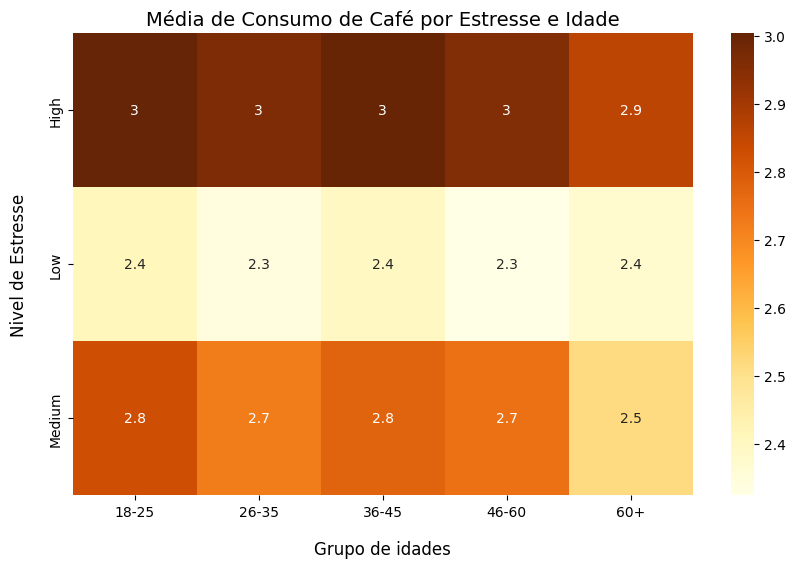

In [24]:
plt.figure(figsize=(10, 6))
paleta = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(tabela_pivotada, annot=True, cmap=paleta)
plt.title('Média de Consumo de Café por Estresse e Idade', fontsize=14)
plt.xlabel('Grupo de idades', fontsize=12, labelpad=15)
plt.ylabel('Nivel de Estresse', fontsize=12, labelpad=15)
plt.show()

#O gráfico mostra uma progressão clara: quanto maior o Nível de Estresse, maior é a Média de Consumo de Café.
#O consumo de café parece ser bastante estável entre as faixas etárias dentro de cada nível de estresse, com uma leve queda no grupo 60+.

# **Principais Insights**

### **Resumo da Análise de Estresse, Sono e Consumo de Café**

A análise dos dados revela uma relação clara entre nível de estresse e consumo médio de café: quanto maior o estresse, maior tende a ser o consumo. Esse padrão se mantém relativamente estável entre as faixas etárias dentro de cada nível de estresse, com uma leve redução no grupo acima de 60 anos.

Em relação ao sono, a maioria dos indivíduos dorme entre 6 e 8 horas por noite. No entanto, observa-se maior ocorrência de privação severa de sono nos grupos “Masculino” e “Feminino”, enquanto o grupo “Outro” apresenta uma distribuição mais equilibrada, apesar de um caso isolado de sono prolongado.

Os dados indicam que níveis mais elevados de estresse estão associados a pior qualidade e menor duração do sono. Em contrapartida, indivíduos menos estressados tendem a dormir mais horas e relatar melhor qualidade de sono. Além disso, há uma relação positiva entre a quantidade de horas dormidas e a qualidade do sono, uma vez que pessoas com sono classificado como bom ou excelente apresentam maior duração do descanso.

Os dados indicam uma relação negativa entre o consumo de café e a qualidade do sono: conforme o consumo de café aumenta, a avaliação do sono tende a se deslocar de categorias mais positivas, como “Excelente”, para categorias mais negativas, como “Ruim”.
Entretanto, a sobreposição significativa entre as distribuições sugere que o consumo de café, isoladamente, não é um fator determinante da qualidade do sono. Isso indica que o sono é um fenômeno multifatorial, provavelmente influenciado também por variáveis como nível de estresse, idade, rotina diária e consumo de álcool.


In [25]:
df['Health_Issues'].isnull().sum()

np.int64(5941)

In [26]:
df['Has_Health_Issues'] = df['Health_Issues'].notna().astype(int)

#Devido ao alto número de valores ausentes, a variável foi transformada em um indicador binário para capturar apenas a presença ou ausência de problemas de saúde,
#reduzindo ruído e viés.

In [27]:
df = df.drop(columns=['Health_Issues'])

In [28]:
df['Caffeine_per_SleepHour'] = df['Caffeine_mg'] / df['Sleep_Hours']

#Criada feature com a media de cafeina por pessoa pelas horas de sono

In [29]:
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption,Age_Group,Coffee_Group,Has_Health_Issues,Caffeine_per_SleepHour
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Other,0,0,36-45,Alto,0,43.746667
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Service,0,0,26-35,Baixo,0,15.177419
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Office,0,0,36-45,Muito Alto,1,85.372881
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Other,0,0,46-60,Moderado,1,34.136986
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Student,0,1,26-35,Alto,1,56.226415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Healthcare,0,1,46-60,Moderado,1,33.300000
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Service,0,0,18-25,Alto,1,55.034483
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,Student,1,1,26-35,Moderado,0,21.605634
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,Student,0,0,36-45,Alto,0,46.728571


In [30]:
df['Risk_Habits'] = ((df['Smoking'] == 1) | (df['Alcohol_Consumption'] == 1)).astype(int)

#Criadas features binarias que se a pessoa fuma ou bebe alcool sera marcada como positiva.

In [31]:
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption,Age_Group,Coffee_Group,Has_Health_Issues,Caffeine_per_SleepHour,Risk_Habits
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Other,0,0,36-45,Alto,0,43.746667,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Service,0,0,26-35,Baixo,0,15.177419,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Office,0,0,36-45,Muito Alto,1,85.372881,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Other,0,0,46-60,Moderado,1,34.136986,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Student,0,1,26-35,Alto,1,56.226415,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Healthcare,0,1,46-60,Moderado,1,33.300000,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Service,0,0,18-25,Alto,1,55.034483,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,Student,1,1,26-35,Moderado,0,21.605634,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,Student,0,0,36-45,Alto,0,46.728571,0


In [32]:
df_tratado = df.drop(['ID', 'Country', 'Coffee_Intake', 'Occupation', 'Stress_Level', 'Age_Group', 'Coffee_Group', 'Smoking', 'Alcohol_Consumption'], axis=1).reset_index(drop=True)
df_tratado.columns

#Removido nivel de estrese por ter alta relação com a qualidade de sono, o que influenciava o modelo a acabar decorando os dados e sendo tratado como Data Lackage

Index(['Age', 'Gender', 'Caffeine_mg', 'Sleep_Hours', 'Sleep_Quality', 'BMI',
       'Heart_Rate', 'Physical_Activity_Hours', 'Has_Health_Issues',
       'Caffeine_per_SleepHour', 'Risk_Habits'],
      dtype='object')

In [33]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Caffeine_mg              10000 non-null  float64
 3   Sleep_Hours              10000 non-null  float64
 4   Sleep_Quality            10000 non-null  object 
 5   BMI                      10000 non-null  float64
 6   Heart_Rate               10000 non-null  int64  
 7   Physical_Activity_Hours  10000 non-null  float64
 8   Has_Health_Issues        10000 non-null  int64  
 9   Caffeine_per_SleepHour   10000 non-null  float64
 10  Risk_Habits              10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.5+ KB


In [34]:
from sklearn.preprocessing import OneHotEncoder

coluna_categorica = 'Gender'

df_categorico = df[[coluna_categorica]]

encoder = OneHotEncoder(drop='if_binary')
df_tratado_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(), columns=encoder.get_feature_names_out())

#Realizando OneHotEncoder na coluca categorica e depois juntando com as colunas númericas

In [35]:
df_final = pd.concat([df_tratado.drop(coluna_categorica, axis = 1), df_tratado_encoded], axis = 1)

In [36]:
df_final

,Age,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Physical_Activity_Hours,Has_Health_Issues,Caffeine_per_SleepHour,Risk_Habits,Gender_Female,Gender_Male,Gender_Other
0,40,328.1,7.5,Good,24.9,78,14.5,0,43.746667,0,0.0,1.0,0.0
1,33,94.1,6.2,Good,20.0,67,11.0,0,15.177419,0,0.0,1.0,0.0
2,42,503.7,5.9,Fair,22.7,59,11.2,1,85.372881,0,0.0,1.0,0.0
3,53,249.2,7.3,Good,24.7,71,6.6,1,34.136986,0,0.0,1.0,0.0
4,32,298.0,5.3,Fair,24.1,76,8.5,1,56.226415,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,199.8,6.0,Fair,30.5,50,10.1,1,33.300000,1,1.0,0.0,0.0
9996,18,319.2,5.8,Fair,19.1,71,11.6,1,55.034483,0,1.0,0.0,0.0
9997,26,153.4,7.1,Good,25.1,66,13.7,0,21.605634,1,0.0,1.0,0.0
9998,40,327.1,7.0,Good,19.3,80,0.1,0,46.728571,0,1.0,0.0,0.0


In [37]:
X = df_final.drop('Sleep_Quality', axis=1)
y = df_final['Sleep_Quality']

#Separação dos dados explicativos e target

In [38]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, random_state = 0)

#Separando os dados para treino, validação e teste

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
modelo_rf = RandomForestClassifier(random_state = 0)
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_train, y_train)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.9830588235294118


In [41]:
modelo_rf = RandomForestClassifier(max_depth = 3, random_state = 0)
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_train, y_train)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

Acurácia de treino: 0.8064313725490196
Acurácia de validação: 0.8084705882352942


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

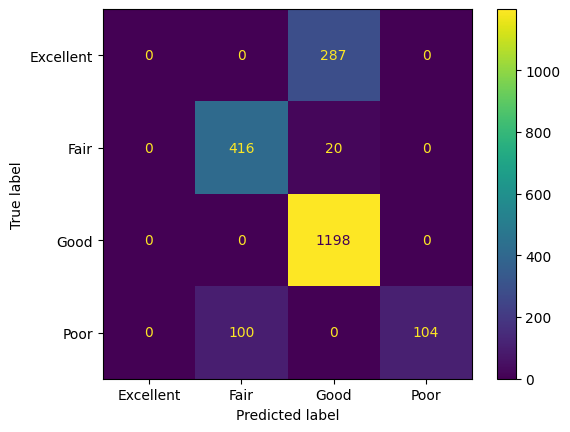

In [43]:
matriz_confusao = confusion_matrix(y_val, y_pred)
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = modelo_rf.classes_)
visualizacao.plot();

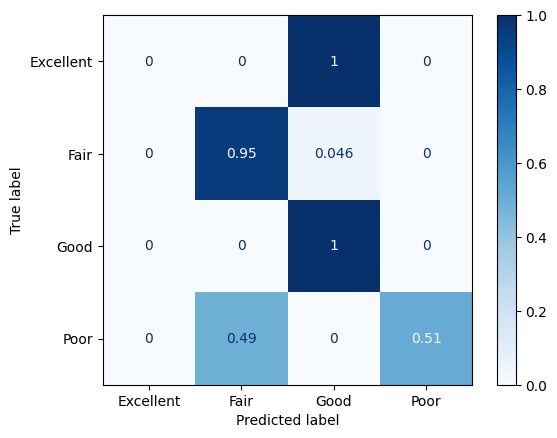

In [44]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = 'true', cmap = 'Blues');

In [45]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print('Relátorio de Classificação:\n', report)

Relátorio de Classificação:
               precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00       287
        Fair       0.81      0.95      0.87       436
        Good       0.80      1.00      0.89      1198
        Poor       1.00      0.51      0.68       204

    accuracy                           0.81      2125
   macro avg       0.65      0.62      0.61      2125
weighted avg       0.71      0.81      0.74      2125



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
y_train.value_counts()

,count
Sleep_Quality,
Good,3593
Fair,1307
Excellent,862
Poor,613


In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

#Igualando as variaveis para não ficar desbalanceado os pesos no treinamento do modelo

In [49]:
y_res.value_counts()

,count
Sleep_Quality,
Excellent,3593
Good,3593
Poor,3593
Fair,3593


In [102]:
modelo = RandomForestClassifier(random_state = 0, max_depth = 3)
modelo.fit(X_res, y_res)
y_pred = modelo.predict(X_val)

              precision    recall  f1-score   support

   Excellent       0.96      0.96      0.96       287
        Fair       0.79      0.97      0.87       436
        Good       0.99      0.89      0.94      1198
        Poor       0.95      1.00      0.97       204

    accuracy                           0.93      2125
   macro avg       0.92      0.96      0.94      2125
weighted avg       0.94      0.93      0.93      2125



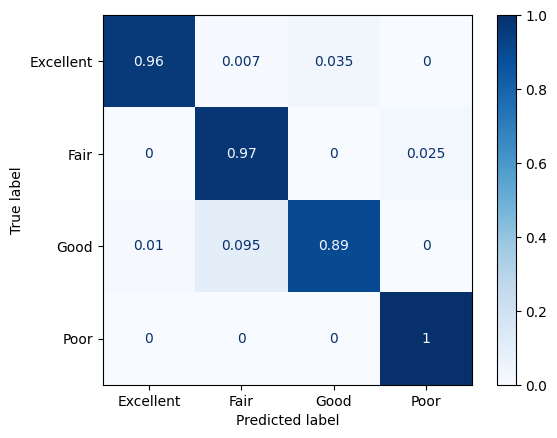

In [103]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = 'true', cmap = 'Blues');


In [104]:
from imblearn.pipeline import Pipeline as imbpipeline

In [105]:
modelo = RandomForestClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])

#Criação da pipeline

In [106]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [107]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'recall_weighted')
cv_resultados['test_score']

#Realizando validação cruzada para verificar os melhores parâmetros do modelo

array([0.90235294, 0.95294118, 0.92705882, 0.91647059, 0.94      ])

In [108]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1.0)}]')

#Calculado o intervalo de confiança de erro do modelo

Intervalo de confiança: [0.8924674511198134, 0.9630619606448925]


              precision    recall  f1-score   support

   Excellent       0.96      0.96      0.96       203
        Fair       0.79      0.97      0.87       307
        Good       0.99      0.89      0.94       846
        Poor       0.95      1.00      0.97       144

    accuracy                           0.93      1500
   macro avg       0.92      0.96      0.94      1500
weighted avg       0.94      0.93      0.93      1500



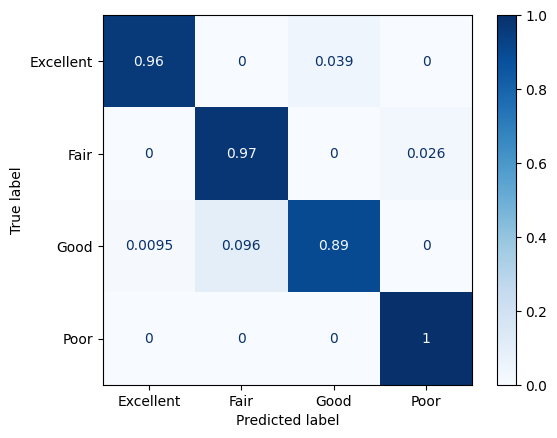

In [109]:
oversample = SMOTE(random_state = 0)
X_res, y_res = oversample.fit_resample(X, y)
modelo = RandomForestClassifier(random_state = 0, max_depth = 3)
modelo.fit(X_res, y_res)
y_pred = modelo.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'true', cmap = 'Blues');

In [110]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'f1_macro')
cv_resultados['test_score']

array([0.91525343, 0.92543046, 0.91503916, 0.93771262, 0.92391276])

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Excellent       0.96      0.96      0.96       203
        Fair       0.79      0.97      0.87       307
        Good       0.99      0.89      0.94       846
        Poor       0.95      1.00      0.97       144

    accuracy                           0.93      1500
   macro avg       0.92      0.96      0.94      1500
weighted avg       0.94      0.93      0.93      1500



In [88]:
#Criação do outro modelo(Regressão logistica)
#Para salvar o outro modelo não executar daqui em diante.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score

In [89]:
logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression(C=0.001, max_iter=100, penalty='l2', solver='newton-cg'))
logistic_pipeline.fit(X_train, y_train)
y_pred_lr = logistic_pipeline.predict(X_val)
print(f'Acurácia de treino: {logistic_pipeline.score(X_train, y_train)}')
print(f'Acurácia de validação: {logistic_pipeline.score(X_val, y_val)}')

#Criação do modelo de regressão linear com pipeline, verificado os melhores parâmetros atráves de GridSearch

Acurácia de treino: 0.7708235294117647
Acurácia de validação: 0.7647058823529411


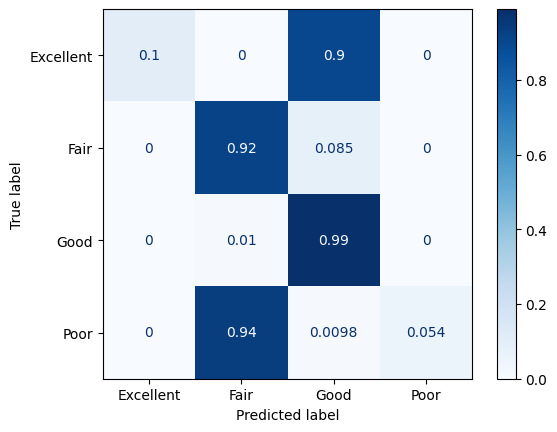

In [91]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_lr, normalize = 'true', cmap = 'Blues');

In [92]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred_lr)
print('Relátorio de Classificação:\n', report)

Relátorio de Classificação:
               precision    recall  f1-score   support

   Excellent       1.00      0.10      0.18       287
        Fair       0.66      0.92      0.77       436
        Good       0.80      0.99      0.88      1198
        Poor       1.00      0.05      0.10       204

    accuracy                           0.76      2125
   macro avg       0.87      0.52      0.48      2125
weighted avg       0.82      0.76      0.69      2125



In [93]:
logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression(C=0.001, max_iter=100, penalty='l2', solver='newton-cg'))
logistic_pipeline.fit(X_res, y_res)
y_pred_lr = logistic_pipeline.predict(X_val)

              precision    recall  f1-score   support

   Excellent       0.64      0.93      0.76       287
        Fair       0.68      0.88      0.77       436
        Good       0.98      0.74      0.85      1198
        Poor       0.79      0.92      0.85       204

    accuracy                           0.81      2125
   macro avg       0.77      0.87      0.81      2125
weighted avg       0.86      0.81      0.82      2125



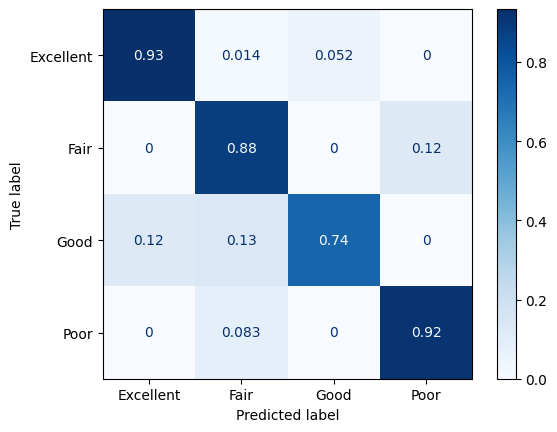

In [95]:
print(classification_report(y_val, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_lr, normalize = 'true', cmap = 'Blues');

In [96]:
modelo_lr = make_pipeline(StandardScaler(), LogisticRegression(C=0.001, max_iter=100, penalty='l2', solver='newton-cg'))
pipeline = imbpipeline([('oversample', SMOTE()), ('regressao_logistica', modelo_lr)])

In [97]:
skf_lr = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_resultados = cross_validate(pipeline, X, y, cv = skf_lr, scoring = 'recall_weighted')
cv_resultados['test_score']

array([0.81411765, 0.82294118, 0.80352941, 0.81117647, 0.81176471])

In [98]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1.0)}]')

Intervalo de confiança: [0.800241955164095, 0.8251698095417873]


              precision    recall  f1-score   support

   Excellent       0.63      0.91      0.74       203
        Fair       0.67      0.90      0.77       307
        Good       0.97      0.72      0.83       846
        Poor       0.81      0.94      0.87       144

    accuracy                           0.81      1500
   macro avg       0.77      0.87      0.80      1500
weighted avg       0.85      0.81      0.81      1500



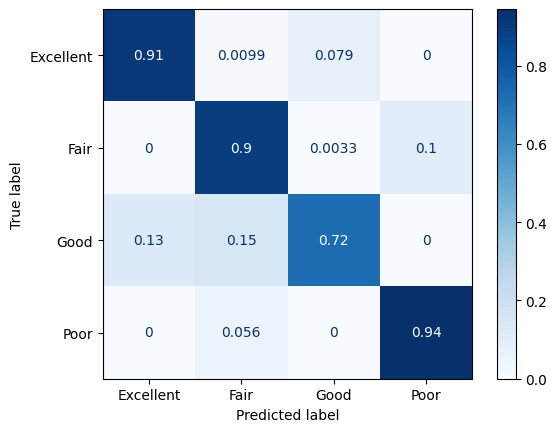

In [99]:
oversample = SMOTE(random_state = 0)
X_res, y_res = oversample.fit_resample(X, y)
modelo_lr = make_pipeline(StandardScaler(), LogisticRegression(C=0.001, max_iter=100, penalty='l2', solver='newton-cg'))
modelo_lr.fit(X_res, y_res)
y_pred_lr = modelo_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, normalize = 'true', cmap = 'Blues');

In [100]:
skf_lr = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'f1_macro')
cv_resultados['test_score']

array([0.80391393, 0.81594628, 0.78686156, 0.80907936, 0.80366874])

# 1️⃣ Contexto do problema

O objetivo foi construir e avaliar modelos de classificação multiclasse para prever a variável target (Excellent, Fair, Good, Poor).
O dataset apresentava desbalanceamento de classes, o que exigiu cuidados especiais na avaliação e no treinamento dos modelos.

Para mitigar esse problema, foi aplicado ***SMOTE*** apenas no conjunto de treino, garantindo uma avaliação realista no conjunto de teste original.


---


#2️⃣ Foram treinados e comparados dois modelos

**Random Forest**

**Regressão Logística Multiclasse**

A avaliação foi realizada exclusivamente em dados de teste não vistos, utilizando métricas adequadas para problemas multiclasse e desbalanceados.


---




#3️⃣ Métricas utilizadas

As métricas consideradas foram:

**Accuracy**

**Precision, Recall e F1-score por classe**

**Macro F1-score (métrica principal)**

**Weighted F1-score**

A métrica Macro F1 foi priorizada por atribuir peso igual a todas as classes, evitando que classes majoritárias mascarassem o desempenho geral.


---


#4️⃣Resultados obtidos

##🔹Random Forest

Accuracy ≈ 0.93

Macro F1 ≈ 0.94

Alto recall e precision em todas as classes, inclusive nas minoritárias (Excellent e Poor).

Excelente equilíbrio entre sensibilidade (recall) e precisão (precision).

##🔹Regressão Logística

Accuracy ≈ 0.81

Macro F1 ≈ 0.80

Recall elevado nas classes minoritárias, porém com queda significativa de precision em Excellent e Fair.

Desempenho inferior na captura de padrões não lineares.


---


#5️⃣ Comparação entre os modelos

O Random Forest superou a Regressão Logística em todas as métricas principais, especialmente no Macro F1-score, indicando melhor desempenho global e maior equilíbrio entre classes.

Enquanto a Regressão Logística apresentou bom desempenho como baseline, sua natureza linear limitou a capacidade de modelar relações mais complexas entre as variáveis.


---


#6️⃣ Análise de overfitting e underfitting
## Overfitting

Não há evidências de overfitting, pois:
O desempenho do Random Forest permaneceu alto no conjunto de teste.
Não houve queda brusca de recall ou F1-score nas classes minoritárias.

## Underfitting

Também não há indícios de underfitting, pois:
Ambos os modelos conseguiram capturar padrões relevantes.
A Regressão Logística apresentou desempenho consistente, embora inferior ao Random Forest.


---


#7️⃣ Conclusão final

O Random Forest foi o modelo que apresentou melhor desempenho geral, demonstrando alta capacidade de generalização, equilíbrio entre classes e robustez frente ao desbalanceamento do dataset.

A Regressão Logística cumpriu bem seu papel como modelo simples de referência, porém mostrou limitações inerentes à sua abordagem linear.

Portanto, o Random Forest é o modelo mais indicado para este problema, não apresentando sinais relevantes de overfitting ou underfitting.

In [72]:
df_final.to_csv('dataset_tratado.csv', index=False, sep=';')

#Salvando o dataset tratado sem nulos para avaliações(Sem SMOTE)

In [112]:
import joblib

joblib.dump(modelo, 'modelo_classificacao.pkl')

['modelo_classificacao.pkl']

# **Recomendações para o Negócio**

Com base nos resultados do modelo de classificação multiclasse, é possível transformar os insights gerados em ações práticas para a empresa, especialmente no que diz respeito à orientação de clientes sobre hábitos de consumo de café e qualidade do sono.

## 1️⃣ Orientação personalizada aos clientes

O modelo demonstrou boa capacidade de identificar diferentes perfis de clientes (Excelente, Bom, Razoável e Ruim) a partir de variáveis comportamentais, como consumo de café e horas de sono.
Com isso, a empresa pode:

Oferecer recomendações personalizadas, ajustando orientações conforme o perfil previsto do cliente.

Alertar clientes classificados como Razoável ou Ruim sobre possíveis excessos no consumo de café ou padrões inadequados de sono.

Exemplo prático:
Clientes com alto consumo de café e poucas horas de sono podem receber sugestões para reduzir o consumo noturno de cafeína e melhorar a rotina de descanso.

## 2️⃣ Prevenção e melhoria da qualidade de vida

Ao identificar clientes em categorias de maior risco, a empresa pode atuar de forma preventiva, incentivando hábitos mais saudáveis antes que os impactos negativos se agravem.

Campanhas educativas sobre quantidade ideal de café por dia.

Conteúdos sobre a importância do sono regular para produtividade e bem-estar.

Isso contribui para:

Maior satisfação do cliente.

Percepção de valor da marca ao promover saúde e bem-estar.

## 3️⃣ Segmentação de campanhas e produtos

Os resultados do modelo permitem segmentar clientes de forma mais estratégica:

Clientes classificados como Excellent ou Good podem receber conteúdos de manutenção de hábitos saudáveis.

Clientes Razoável ou Ruim podem receber campanhas direcionadas, como:

Programas de redução de cafeína.

Sugestões de substitutos ao café em determinados horários.

Dicas práticas para melhorar a higiene do sono.

##4️⃣ Apoio à tomada de decisão baseada em dados

O uso do modelo reduz decisões baseadas apenas em intuição e permite que a empresa:

Monitore mudanças no perfil dos clientes ao longo do tempo.

Avalie o impacto de campanhas educativas nos hábitos de café e sono.

Ajuste estratégias conforme a evolução dos indicadores.

##5️⃣ Escalabilidade e automação

Como o modelo foi salvo e pode ser reutilizado, ele pode ser integrado a sistemas da empresa para:

Avaliar automaticamente novos clientes.

Gerar recomendações em tempo real.

Apoiar equipes de atendimento com sugestões baseadas em dados.

###Conclusão

Os resultados do modelo mostram que técnicas de Machine Learning podem ser utilizadas não apenas para classificação, mas também como ferramenta estratégica de apoio ao negócio, auxiliando a empresa a orientar seus clientes de forma mais assertiva, promovendo hábitos saudáveis de consumo de café e melhor qualidade de sono.